In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

%matplotlib inline 

# Parameters
N=19
dt=0.1; # seconds
path='/home/ronaldo/Dados/ProjectUfabc/MouseData/SimulationData/Seed1/'
# pathFigure='/home/ronaldo/Dados/ProjectUfabc/PaperFigures/Paper1/Figures/'
areasName=['GU','SSp-un','VISC','MOp','PL','SSs','SSp-bfd','ACAd','RL','AL','DP','AUDpo','AM','V1'
     ,'MM','LM','PM','RSPd','P']

ticks=[0.5,1.5,2.5,3.5,4.5,5.5,6.5,7.5,
       8.5,9.5,10.5,11.5,12.5,13.5,14.5,15.5,
       16.5,17.5,18.5]  

import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = True
mpl.rcParams['axes.spines.top'] = True

### Raster Plot

In [16]:
xValues=[]
yValues=[]
for i in range(19):
    spikeData=np.load(path+'Spikes_'+str(i+1)+'.npy')

    xValues.extend(spikeData[:,0])
    yValues.extend(spikeData[:,1])

# numpy array
spikeIdx=np.array(yValues)
spikeTime=np.array(xValues)

array([ 1832.,  1872.,  1652., ..., 37487., 36883., 37592.])

([<matplotlib.axis.YTick at 0x7f56e2dd6e50>,
 [Text(0, 0.5, ''),
  Text(0, 1.5, ''),
  Text(0, 2.5, ''),
  Text(0, 3.5, ''),
  Text(0, 4.5, ''),
  Text(0, 5.5, ''),
  Text(0, 6.5, ''),
  Text(0, 7.5, ''),
  Text(0, 8.5, ''),
  Text(0, 9.5, ''),
  Text(0, 10.5, ''),
  Text(0, 11.5, ''),
  Text(0, 12.5, ''),
  Text(0, 13.5, ''),
  Text(0, 14.5, ''),
  Text(0, 15.5, ''),
  Text(0, 16.5, ''),
  Text(0, 17.5, ''),
  Text(0, 18.5, '')])

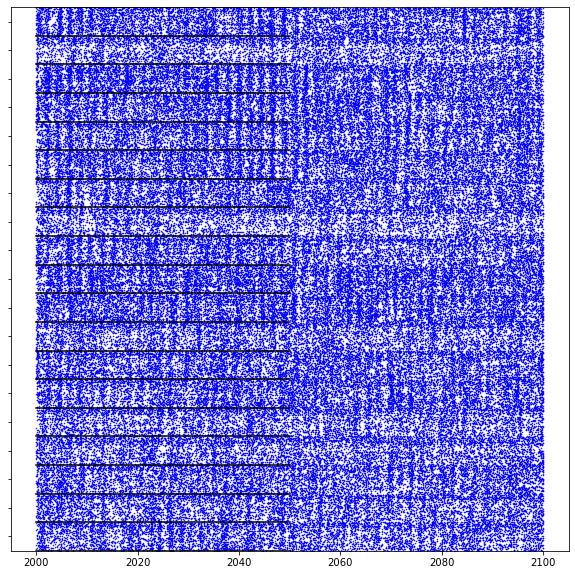

In [15]:
plt.figure(figsize=(10,10))
condition=(spikeTime>=20000) & (spikeTime<=21000)
plt.plot(spikeTime[condition]*dt,spikeIdx[condition]/2000,'b.',markersize=1)
plt.xlim([2000,2050])
plt.ylim([0,19])
plt.plot([2000,2050], np.arange(N+1).repeat(2).reshape(-1, 2).T, 'k-')
plt.yticks(ticks[:N],'')
plt.xticks([2000,2010,2020,2030,2040,2050],'')
plt.savefig('Spikes.png', format='png', dpi=500)
# plt.close

### LFP


<IPython.core.display.Javascript object>


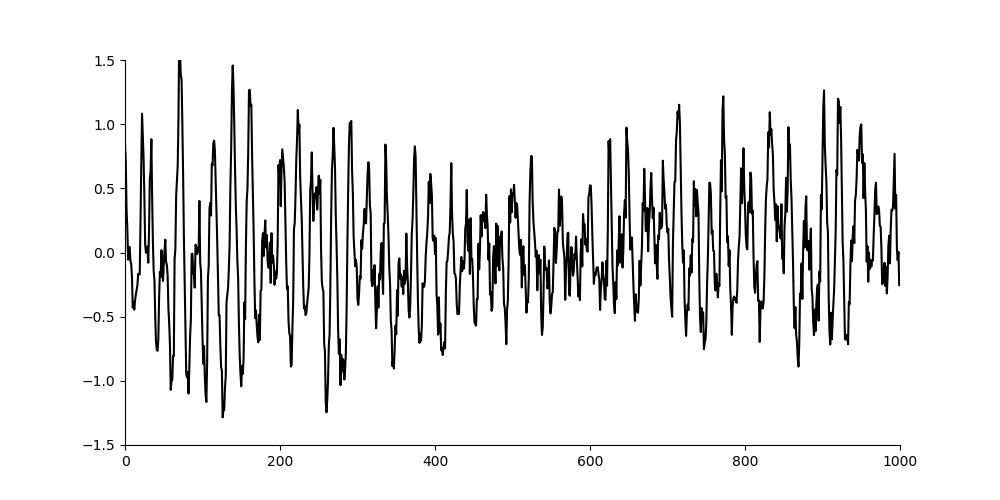

In [14]:
import matplotlib as mpl

mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

#########################################
# LFP for node 3
#########################################

lfpData=np.load(path+'lfpDownsampled.npy')
lfpData=lfpData[3,:]
plt.figure(figsize=(10,5))
plt.plot(lfpData[1000:2000],'k') 
plt.xlim([0,1000])
plt.ylim([-1.5,1.5])
plt.savefig(pathFigure+'LFP.eps', format='eps', dpi=500)


### PSD

<IPython.core.display.Javascript object>


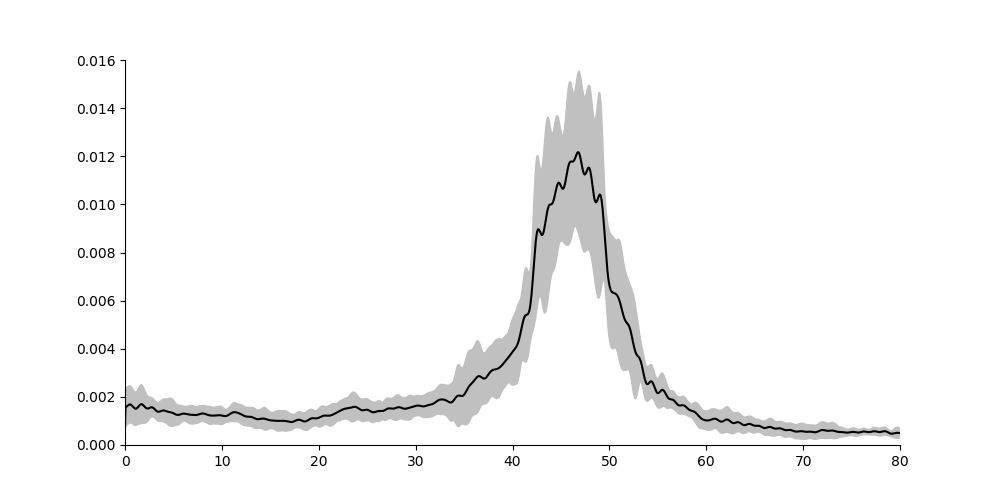

In [44]:
# Dados gerados em matlab
data = loadmat('/home/ronaldo/Dados/ProjectUfabc/PaperFigures/Paper1/Data/psd.mat')
plt.figure(figsize=(10,5))
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

frequency=np.squeeze(np.array(data['freq']))
meanValues=np.squeeze(np.array(data['meanPSD']))
stdValues=np.squeeze(np.array(data['stdPSD']))
plt.plot(frequency,meanValues , 'k-')
plt.fill_between(frequency, meanValues-stdValues, meanValues+stdValues,color='silver')
plt.xlim(0,80)
plt.ylim(0,0.0160)
plt.show()
plt.savefig(pathFigure+'PSD.eps', format='eps', dpi=500)

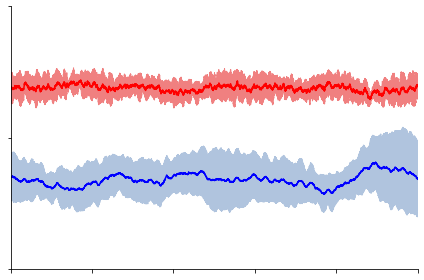

In [4]:
# Dados gerados em Python
# timefr,meanfrE,stdfrE,meanfrI,stdfrI
# Pega um segundo a frente porque não foi descontado transiente nos spikes

data = loadmat('/home/ronaldo/Dados/ProjectUfabc/PaperFigures/Paper1/Data/firingRate.mat')
plt.figure()
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

time=np.squeeze(np.array(data['time']))
meanValues=np.squeeze(np.array(data['frEmean']))
stdValues=np.squeeze(np.array(data['frEstd']))
plt.plot(time,meanValues , 'b-')
plt.fill_between(time, meanValues-stdValues, meanValues+stdValues,color='lightsteelblue')

meanValues=np.squeeze(np.array(data['frImean']))
stdValues=np.squeeze(np.array(data['frIstd']))
plt.plot(time,meanValues , 'r-')
plt.fill_between(time, meanValues-stdValues, meanValues+stdValues,color='lightcoral')
plt.xlim(2000,3000)
plt.ylim(2,6)
plt.yticks([2.0,4.0,6.0],'')
plt.xticks([2000,2200,2400,2600,2800,3000],'')
plt.tight_layout()
plt.savefig(pathFigure+'firingRate.png', format='png', dpi=1200)

In [2]:
# Firing Rate for all system

In [3]:
data = loadmat('/home/ronaldo/Dados/ProjectUfabc/PaperFigures/Paper1/Data/firingRate.mat')

In [7]:
np.mean(data['frEmean'])

3.4123134011821366

In [8]:
np.mean(data['frImean'])

4.737895462870476